# Visualize cross section from the predicted results

In [1]:
import os
import sys 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
WIDTH = 70
LONG = 1320
STEP = 2

points_width = int(WIDTH/ STEP)
points_long = int(LONG/ STEP)

total_points = points_width*points_long


In [3]:
print(total_points)

23100


In [4]:
# Specific soil types
assign_num_list = {'uncertain': 9,
                    'topsoil layer': 8,
                    'reclaimed layer': 7,
                    'sedimentary layer': 6,
                    'colluvial layer': 5,
                    'weathered soil': 4,
                    'weathered rock': 3,
                    'soft rock': 2,
                    'moderate rock': 1,
                     'hard rock': 0,
                  }

labels = {}
for k, v in assign_num_list.items():
    labels[v] = k
    
label_colours = ['black', 'brown', 'red', 'magenta',
                'pink', 'yellow', 'green',
                'blue','cyan','silver']

In [5]:
DATA_DIR = '/home/daitran/Desktop/git/soil_properties/export_dataframe.csv'

In [6]:
data = pd.read_csv(DATA_DIR)

In [7]:
data

,X,Y,Elevation,Target
0,549500,213550,80,9
1,549500,213550,90,9
2,549500,213550,100,0
3,549500,213550,110,1
4,549500,213550,120,2
...,...,...,...,...
2235,551450,213900,100,2
2236,551450,213900,110,3
2237,551450,213900,120,5
2238,551450,213900,130,6


In [8]:
def extract_cross_section(inquiry_X = False, inquiry_Y= False, inquiry_elevation = False):
    if inquiry_X:
        print('Process X')
        temp_df = data.loc[data['X'] == inquiry_X]
    elif inquiry_Y:
        print('Process Y')
        temp_df = data.loc[data['Y'] == inquiry_Y]
    elif inquiry_elevation:
        temp_df = data.loc[data['Elevation'] == inquiry_elevation]
    else: 
        temp_df = data
#     print(temp)
    X = temp_df[['X','Y','Elevation']].to_numpy()
    soil_type = temp_df['Target'].to_numpy()
    return X, soil_type

In [9]:
X, soil_type = extract_cross_section(inquiry_Y = 213550)

Process Y


In [10]:
# sns.set(style = "darkgrid")
# fig = plt.figure(figsize=(20, 10))
# ax = fig.add_subplot(121, projection='3d')

# for c in np.unique(soil_type):
#     inx = np.where(soil_type == c)

#     ax.scatter(X[inx, 0], X[inx, 1], X[inx, 2], label=labels[c], c=label_colours[c], s = 10)

# ax.plot(X[:, 0], X[:, 1], X[:, 2])
# plt.show()

In [11]:
def plot_cross_section_X(x, y, labels, colours):
    
    sns.set(style = "darkgrid")
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot() 
    for c in np.unique(y):
        inx = np.where(y == c)
        
        ax.scatter(x[inx, 0], x[inx, 2], label=labels[c], c=colours[c], s = 10)
        
        
        ax.set_xlabel('Y')
        ax.set_ylabel('Elevation')
#         ax.set_zlabel('Elevation')

#         break
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)                  

In [12]:
soil_type

array([9, 9, 0, 1, 2, 3, 4, 9, 9, 0, 1, 2, 3, 4, 9, 9, 0, 1, 2, 3, 4, 9,
       9, 0, 1, 2, 3, 4, 9, 9, 0, 1, 2, 3, 4, 9, 9, 0, 1, 2, 3, 4, 9, 9,
       0, 1, 2, 3, 4, 9, 9, 0, 1, 2, 3, 4, 9, 9, 0, 1, 2, 3, 4, 9, 9, 0,
       1, 2, 3, 4, 9, 9, 0, 1, 2, 3, 4, 9, 9, 0, 1, 2, 3, 4, 9, 9, 0, 1,
       2, 3, 4, 9, 9, 0, 1, 2, 3, 4, 9, 9, 0, 1, 2, 3, 4, 9, 9, 0, 1, 2,
       3, 4, 9, 9, 0, 1, 2, 3, 4, 9, 9, 0, 1, 2, 3, 4, 9, 9, 0, 1, 2, 3,
       4, 9, 0, 0, 1, 2, 3, 4, 9, 0, 0, 1, 2, 3, 4, 9, 0, 0, 1, 2, 3, 4,
       9, 0, 0, 1, 2, 3, 4, 9, 0, 0, 1, 2, 3, 4, 9, 0, 0, 1, 2, 3, 4, 9,
       0, 0, 1, 2, 3, 4, 9, 0, 0, 1, 2, 3, 4, 9, 0, 0, 1, 2, 3, 4, 0, 0,
       0, 1, 2, 3, 4, 0, 0, 0, 1, 2, 3, 4, 0, 0, 0, 1, 2, 3, 4, 0, 0, 0,
       1, 2, 3, 4, 0, 0, 0, 1, 2, 3, 4, 0, 0, 0, 1, 2, 3, 4, 0, 0, 0, 1,
       2, 3, 4, 0, 0, 0, 1, 2, 3, 4, 0, 0, 0, 1, 2, 3, 4, 0, 0, 0, 1, 2,
       3, 4, 0, 0, 0, 1, 2, 3, 4, 0, 0, 0, 1, 2, 3, 4])

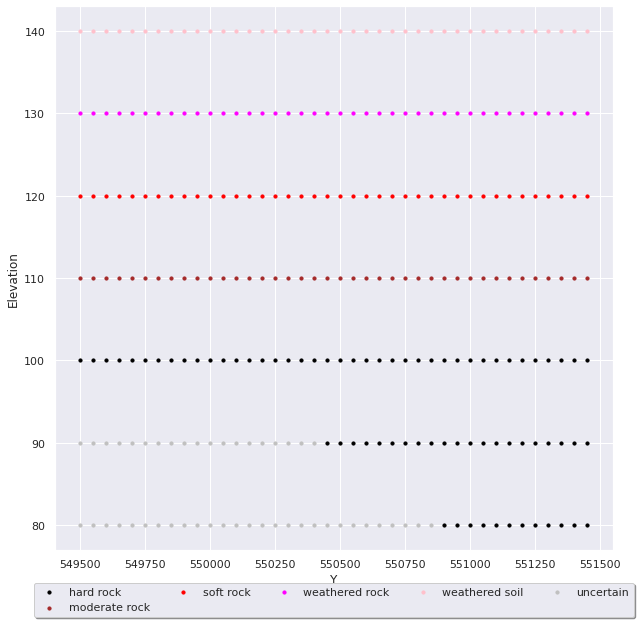

In [13]:
plot_cross_section_X(X, soil_type, labels, label_colours)
plt.show()

In [14]:
x = X[:, 0]
y = X[:, 2]
z = soil_type

In [15]:
# Set up a regular grid of interpolation points
xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)


In [16]:
import scipy.interpolate
# Interpolate
rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
zi = rbf(xi, yi)

In [17]:
zi.shape

(100, 100)

In [18]:
z_int = zi.astype(int)

In [19]:
z_int

array([[9, 8, 8, ..., 0, 0, 0],
       [9, 8, 8, ..., 0, 0, 0],
       [9, 7, 8, ..., 0, 0, 0],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [4, 3, 3, ..., 3, 3, 4]])

In [20]:
z.min()

0

In [21]:
z.max()

9

In [22]:
import PyQt5
%matplotlib inline

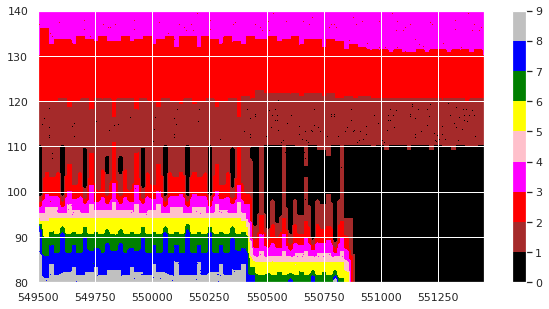

In [25]:
import matplotlib as mpl
import matplotlib

colors = label_colours
bounds = [0,1,2,3,4,5,6,7,8,9]

cmap = mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


# cmap = mpl.colors.ListedColormap(['blue', 'green', 'red', 'cyan',
#                  'magenta', 'yellow', 'black', 'brown', 
#                  'pink','silver'])

# my_cmap = matplotlib.cm.get_cmap('rainbow')
# my_cmap.set_under('w')


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

plt.imshow(z_int, vmin=0, vmax=8, origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()],
          cmap=cmap, norm=norm)

# plt.scatter(x, y, c=z,
#            vmin =0, vmax = 8)

ax.set_aspect('auto')
plt.colorbar()
# plt.xlable('X')
plt.savefig('/home/daitran/Desktop/git/soil_properties/figures/cross_section.png')
plt.show()

In [27]:
z_int

array([[9, 8, 8, ..., 0, 0, 0],
       [9, 8, 8, ..., 0, 0, 0],
       [9, 7, 8, ..., 0, 0, 0],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [4, 3, 3, ..., 3, 3, 4]])

In [28]:
z_int.shape

(100, 100)

In [29]:
def plot_data(x, y, labels, colours):
    
    sns.set(style = "darkgrid")

    fig = plt.figure(figsize=(10, 10))
    
    ax = fig.add_subplot(projection='3d')

    for c in np.unique(y):
#         print(c)
        inx = np.where(y == c)
        
        ax.scatter(x[inx, 0], x[inx, 1], x[inx, 2], label=labels[c], c=colours[c], s = 5)
        
#         ax.plot(x[inx, 0], x[inx, 1], x[inx, 2], label=labels[c], c=colours[c])
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Elevation')

#         break
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

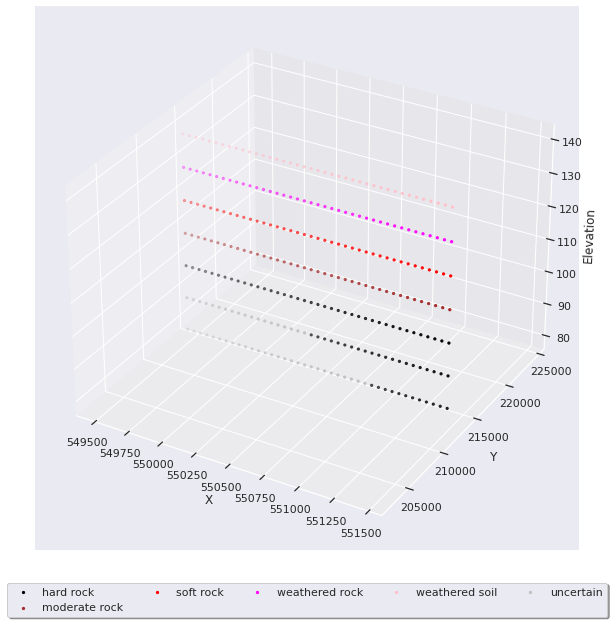

In [30]:
import PyQt5
%matplotlib inline
# %matplotlib qt

plot_data(X, soil_type, labels, label_colours)

plt.show()

In [31]:
min(X[:,0])

549500

In [58]:
max(X[:,0])

551450

In [59]:
max(X[:,0]) - min(X[:,0])

1950

In [70]:
xx, yy = np.meshgrid(np.arange(min(X[:,0]), max(X[:,0]), 1), np.arange(min(X[:,1]) , max(X[:,1]) , 1))

In [71]:
xx.shape

(350, 1950)

In [72]:
size_x = max(X[:,0]) - min(X[:,0])
size_y = max(X[:,1]) - min(X[:,1])
                          

In [73]:
zz = np.zeros((size_y, size_x))

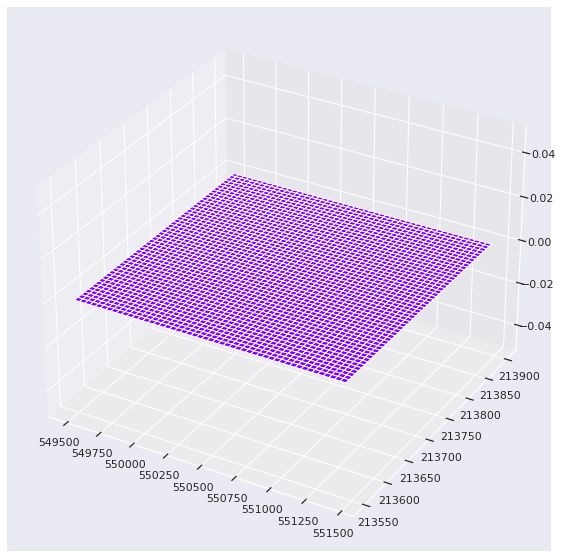

In [74]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, cmap=plt.cm.rainbow) 
plt.show()